### Problem Formulation 

1.   Investigate which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) and do some EDA.
2.   Plot bar charts showing impacts of employee salaries on retention.
3.   Plot bar charts showing correlation between department and employee retention.
4.   Now build logistic regression model using variables that were narrowed down in step 1.
5.   Measure the accuracy of the model

### Question 1

#### Import modules and libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, explained_variance_score, accuracy_score, log_loss

In [2]:
# change scientific number to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# increasing sns plot figure
sns.set(rc={'figure.figsize':(8,5)})

#### Import data 

In [6]:
hr_data = pd.read_csv('HR_comma_sep.csv')
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Data cleaning and preprocessing 

In [7]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
hr_data['left'].replace({0: 'Stay', 1:'Leave'}, inplace=True)

#### Q1.1 How many employees left the company? 

In [8]:
left = hr_data[hr_data['left'] == 1]
print(len(left['left']))

3571


C:\Users\zakia.tessa.TRANS7TV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

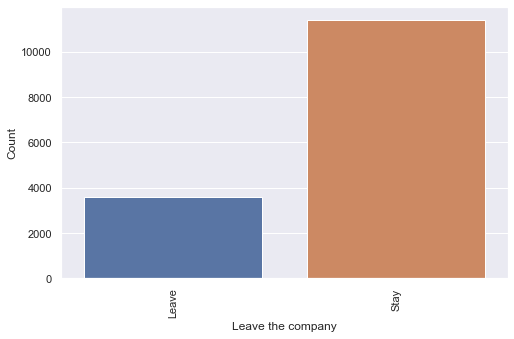

In [15]:
axes = sns.countplot(hr_data['left'])
axes.set(xlabel='Leave the company', ylabel='Count')
plt.xticks(rotation=90)